In [1]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

from rllr.utils.plotting.video import show_video
from rllr.utils.logger import init_logger
from rllr.utils.common import switch_reproducibility_on
from rllr.utils.plotting.display import display_stats

In [3]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../experiments/conf/minigrid_navigation_mlp_master_worker.hocon')
config['env']['video_path'] = './video/'

In [4]:
switch_reproducibility_on(config['seed'])

# Train worker

In [5]:
from experiments import train_worker
init_logger('experiments.train_worker')

In [6]:
env = train_worker.gen_navigation_env(config['env'])

In [7]:
worker_agent = train_worker.get_worker_agent(config)

2021-06-23 18:55:52,771 INFO    rllr.algo.dqn          : Running on device: cpu


In [8]:
scores, steps = train_worker.train_worker(env, worker_agent, n_episodes=1000, verbose=100)

2021-06-23 18:57:12,484 INFO    experiments.train_worker   : Episode: 100. scores: -14.81, steps: 155.57, achieved: 0.68
2021-06-23 18:58:24,344 INFO    experiments.train_worker   : Episode: 200. scores: -12.52, steps: 133.52, achieved: 0.76
2021-06-23 18:59:34,053 INFO    experiments.train_worker   : Episode: 300. scores: -11.31, steps: 122.86, achieved: 0.89
2021-06-23 19:00:48,435 INFO    experiments.train_worker   : Episode: 400. scores: -12.71, steps: 135.90, achieved: 0.80
2021-06-23 19:01:56,978 INFO    experiments.train_worker   : Episode: 500. scores: -11.24, steps: 121.24, achieved: 0.80
2021-06-23 19:03:00,781 INFO    experiments.train_worker   : Episode: 600. scores: -11.38, steps: 122.01, achieved: 0.75
2021-06-23 19:04:27,378 INFO    experiments.train_worker   : Episode: 700. scores: -15.74, steps: 164.53, achieved: 0.65
2021-06-23 19:05:51,360 INFO    experiments.train_worker   : Episode: 800. scores: -13.93, steps: 146.77, achieved: 0.68
2021-06-23 19:07:06,557 INFO    

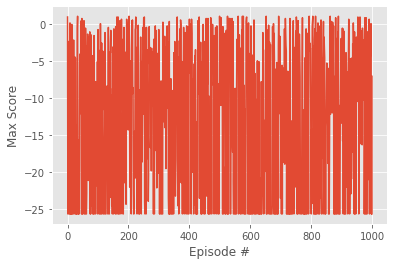

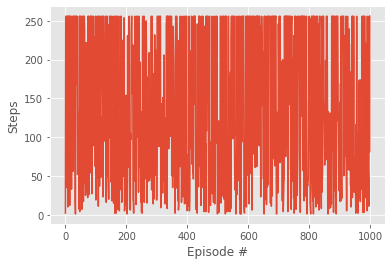

In [9]:
display_stats(scores, steps)

# Train master

In [10]:
from experiments import train_master
init_logger('experiments.train_master')

In [11]:
config = ConfigFactory.parse_file('../experiments/conf/minigrid_navigation_mlp_master_worker.hocon')
del config['env']['goal_achieving_criterion']
del config['env']['goal_type']

In [12]:
emb_size = worker_agent.qnetwork_local.state_encoder.goal_state_encoder.output_size
master_agent = train_master.get_master_agent(emb_size, config)
worker_agent.explore = False

In [13]:
env = train_worker.gen_env(config['env'])

In [14]:
scores, steps = train_master.train_worker(env, worker_agent, master_agent, n_episodes=1000, verbose=100)

2021-06-23 19:08:32,350 INFO    experiments.train_master   : Episode: 100. scores: -1.00, steps: 7.03
2021-06-23 19:08:43,310 INFO    experiments.train_master   : Episode: 200. scores: -0.96, steps: 8.34
2021-06-23 19:08:52,573 INFO    experiments.train_master   : Episode: 300. scores: -0.98, steps: 7.86
2021-06-23 19:09:02,081 INFO    experiments.train_master   : Episode: 400. scores: -0.96, steps: 8.34
2021-06-23 19:09:12,352 INFO    experiments.train_master   : Episode: 500. scores: -0.96, steps: 9.08
2021-06-23 19:09:20,645 INFO    experiments.train_master   : Episode: 600. scores: -0.96, steps: 7.61
2021-06-23 19:09:30,922 INFO    experiments.train_master   : Episode: 700. scores: -0.98, steps: 9.23
2021-06-23 19:09:42,936 INFO    experiments.train_master   : Episode: 800. scores: -0.96, steps: 10.72
2021-06-23 19:09:54,810 INFO    experiments.train_master   : Episode: 900. scores: -0.94, steps: 11.33
2021-06-23 19:10:07,364 INFO    experiments.train_master   : Episode: 1000. scor

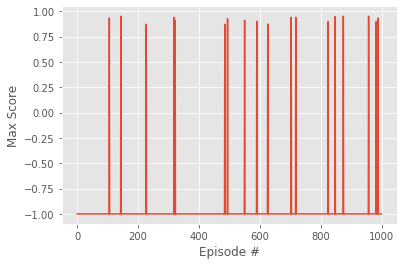

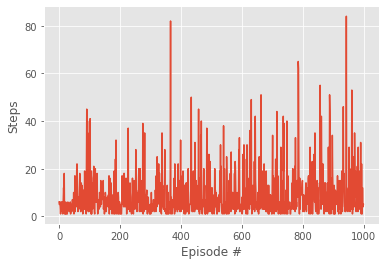

In [15]:
display_stats(scores, steps)